In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
#Load the dataset
df = pd.read_csv('insurance (1).csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Preprocessing and cleaning dataset
#Encoding categorical variables
df = pd.get_dummies(df)

In [8]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('children', axis =1),df['children'], test_size=0.2, random_state=42)

In [9]:
#creating random forest classifier
rf = RandomForestClassifier(n_estimators=100)

In [10]:
#Training the random forest classifier on the training dataset
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
#making predictions on the test dataset
y_pred = rf.predict(X_test)

In [12]:
#Calculating accurancy of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accurancy:', accuracy_score(y_test, y_pred))

Accurancy: 0.5


In [17]:
#plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


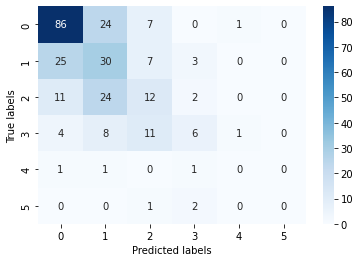

In [18]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()